In [1]:
# TASK 1 — DATA ACQUISITION & CLEANING
# ------------------------------------
# This cell prepares the dataset for downstream EDA and the Streamlit dashboard.
# It performs:
#   • Loading the CSV
#   • Removing fully-empty columns
#   • Dropping sparse infraspecificEpithet
#   • Parsing event dates
#   • Fixing numeric columns
#   • Cleaning and validating coordinates
#   • Stripping taxonomy text
#   • Creating a full 'Country' column (ISO → full name)
#   • Saving a cleaned CSV for the dashboard

import pandas as pd
import numpy as np
import pycountry

# Path of your dataset (uploaded CSV)
raw_csv_path = "APP_final_dashboard_dataset_8.csv"

# Load dataset
df = pd.read_csv(raw_csv_path)
print("Original shape:", df.shape)
print("Original columns:", list(df.columns))

# ---------------------------------------------------------
# 1. Remove fully empty columns
# ---------------------------------------------------------
df = df.dropna(axis=1, how="all")
print("\nAfter dropping empty columns:", df.shape)

# ---------------------------------------------------------
# 2. Drop infraspecificEpithet (90% missing, low utility)
# ---------------------------------------------------------
if "infraspecificEpithet" in df.columns:
    df = df.drop(columns=["infraspecificEpithet"])
    print("Dropped: infraspecificEpithet")

# ---------------------------------------------------------
# 3. Parse eventDate → datetime
# ---------------------------------------------------------
if "eventDate" in df.columns:
    df["eventDate"] = pd.to_datetime(df["eventDate"], errors="ignore")

# ---------------------------------------------------------
# 4. Convert numeric fields
# ---------------------------------------------------------
numeric_cols = [
    "year", "month", "day",
    "decimalLatitude", "decimalLongitude",
    "coordinateUncertaintyInMeters", "coordinatePrecision",
    "elevation", "elevationAccuracy",
    "depth", "depthAccuracy",
    "individualCount"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# ---------------------------------------------------------
# 5. Clean invalid latitude/longitude rows
# ---------------------------------------------------------
if {"decimalLatitude", "decimalLongitude"}.issubset(df.columns):
    before = len(df)
    df = df[
        df["decimalLatitude"].between(-90, 90)
        & df["decimalLongitude"].between(-180, 180)
    ]
    after = len(df)
    print(f"Removed {before - after} invalid coordinate rows.")

# ---------------------------------------------------------
# 6. Strip whitespace from important text fields
# ---------------------------------------------------------
text_cols = [
    "kingdom", "phylum", "class", "order", "family", "genus", "species",
    "scientificName", "stateProvince", "countryCode", "locality",
    "occurrenceStatus"
]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# ---------------------------------------------------------
# 7. Add NEW full Country name column
# ---------------------------------------------------------
def get_country_name(code):
    try:
        c = pycountry.countries.get(alpha_2=str(code).upper())
        return c.name if c else "Unknown"
    except:
        return "Unknown"

if "countryCode" in df.columns:
    df["Country"] = df["countryCode"].apply(get_country_name)
    print("Created full 'Country' column.")

# ---------------------------------------------------------
# 8. Sort by year
# ---------------------------------------------------------
if "year" in df.columns:
    df = df.sort_values(by="year")

# ---------------------------------------------------------
# 9. Save cleaned dataset
# ---------------------------------------------------------
clean_path = "APP_final_dashboard_dataset_8_clean.csv"
df.to_csv(clean_path, index=False)

print("\nFinal cleaned dataset saved as:", clean_path)
df.head()


Original shape: (100000, 50)
Original columns: ['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'infraspecificEpithet', 'taxonRank', 'scientificName', 'verbatimScientificName', 'verbatimScientificNameAuthorship', 'countryCode', 'locality', 'stateProvince', 'occurrenceStatus', 'individualCount', 'publishingOrgKey', 'decimalLatitude', 'decimalLongitude', 'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation', 'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day', 'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord', 'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber', 'identifiedBy', 'dateIdentified', 'license', 'rightsHolder', 'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted', 'mediaType', 'issue']

After dropping empty columns: (100000, 39)
Dropped: infraspecificEpithet
Removed 227 invalid coordinate rows.


C:\Users\HP\AppData\Local\Temp\ipykernel_16700\3830318865.py:44: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df["eventDate"] = pd.to_datetime(df["eventDate"], errors="ignore")


Created full 'Country' column.

Final cleaned dataset saved as: APP_final_dashboard_dataset_8_clean.csv


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,catalogNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,lastInterpreted,mediaType,issue,Country
57970,2350354961,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/30523776,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Rubraea,nan,...,30523776,Thomas Desloges,2023-07-27T17:06:39,CC_BY_NC_4_0,Ken Harris EntSocVic,Ken Harris EntSocVic,2023-09-21T13:43:27.514Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,Ghana
4120,4162579402,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17352...,Plantae,Tracheophyta,Liliopsida,Asparagales,Orchidaceae,Calochilus,Calochilus paludosus,...,173529669,Colin Ogle,2023-07-18T02:33:31,CC_BY_NC_4_0,Colin Ogle,Colin Ogle,2023-09-21T14:58:18.102Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,New Zealand
26717,3067949923,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/72010258,Plantae,Tracheophyta,Liliopsida,Asparagales,Orchidaceae,Ophrys,Ophrys apifera,...,72010258,Drepanostoma,2021-03-25T11:19:42,CC_BY_NC_4_0,Drepanostoma,Drepanostoma,2023-09-21T15:35:26.022Z,StillImage;StillImage;StillImage;StillImage;St...,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,United Kingdom
74393,3466019272,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10565...,Animalia,Arthropoda,Insecta,Lepidoptera,Geometridae,Chiasmia,Chiasmia clathrata,...,105656051,Drepanostoma,2022-01-27T09:50:28,CC_BY_NC_4_0,Drepanostoma,Drepanostoma,2023-09-21T14:21:53.431Z,StillImage;StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,Italy
40655,3466533383,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10595...,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Nyctaginaceae,Allionia,Allionia incarnata,...,105956886,Drepanostoma,2022-02-01T09:52:33,CC_BY_NC_4_0,Drepanostoma,Drepanostoma,2023-09-21T15:54:00.195Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,United States


## 1. Dataset Overview

Shape: (99773, 39)


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,catalogNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,lastInterpreted,mediaType,issue,Country
0,2350354961,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/30523776,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Rubraea,NaN,...,30523776,Thomas Desloges,2023-07-27T17:06:39,CC_BY_NC_4_0,Ken Harris EntSocVic,Ken Harris EntSocVic,2023-09-21T13:43:27.514Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,Ghana
1,4162579402,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17352...,Plantae,Tracheophyta,Liliopsida,Asparagales,Orchidaceae,Calochilus,Calochilus paludosus,...,173529669,Colin Ogle,2023-07-18T02:33:31,CC_BY_NC_4_0,Colin Ogle,Colin Ogle,2023-09-21T14:58:18.102Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,New Zealand
2,3067949923,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/72010258,Plantae,Tracheophyta,Liliopsida,Asparagales,Orchidaceae,Ophrys,Ophrys apifera,...,72010258,Drepanostoma,2021-03-25T11:19:42,CC_BY_NC_4_0,Drepanostoma,Drepanostoma,2023-09-21T15:35:26.022Z,StillImage;StillImage;StillImage;StillImage;St...,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,United Kingdom
3,3466019272,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10565...,Animalia,Arthropoda,Insecta,Lepidoptera,Geometridae,Chiasmia,Chiasmia clathrata,...,105656051,Drepanostoma,2022-01-27T09:50:28,CC_BY_NC_4_0,Drepanostoma,Drepanostoma,2023-09-21T14:21:53.431Z,StillImage;StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,Italy
4,3466533383,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10595...,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Nyctaginaceae,Allionia,Allionia incarnata,...,105956886,Drepanostoma,2022-02-01T09:52:33,CC_BY_NC_4_0,Drepanostoma,Drepanostoma,2023-09-21T15:54:00.195Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,United States


C:\Users\HP\AppData\Local\Temp\ipykernel_16700\255693938.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df["eventDate"] = pd.to_datetime(df["eventDate"], errors="ignore")


### Missing Values (%)

coordinateUncertaintyInMeters    19.474206
mediaType                         3.641266
order                             3.039901
class                             1.374119
species                           1.256853
speciesKey                        1.256853
identifiedBy                      0.417949
dateIdentified                    0.417949
stateProvince                     0.291662
genus                             0.104237
countryCode                       0.079180
family                            0.060137
phylum                            0.014032
rightsHolder                      0.000000
taxonKey                          0.000000
license                           0.000000
lastInterpreted                   0.000000
issue                             0.000000
catalogNumber                     0.000000
collectionCode                    0.000000
institutionCode                   0.000000
basisOfRecord                     0.000000
recordedBy                        0.000000
gbifID     

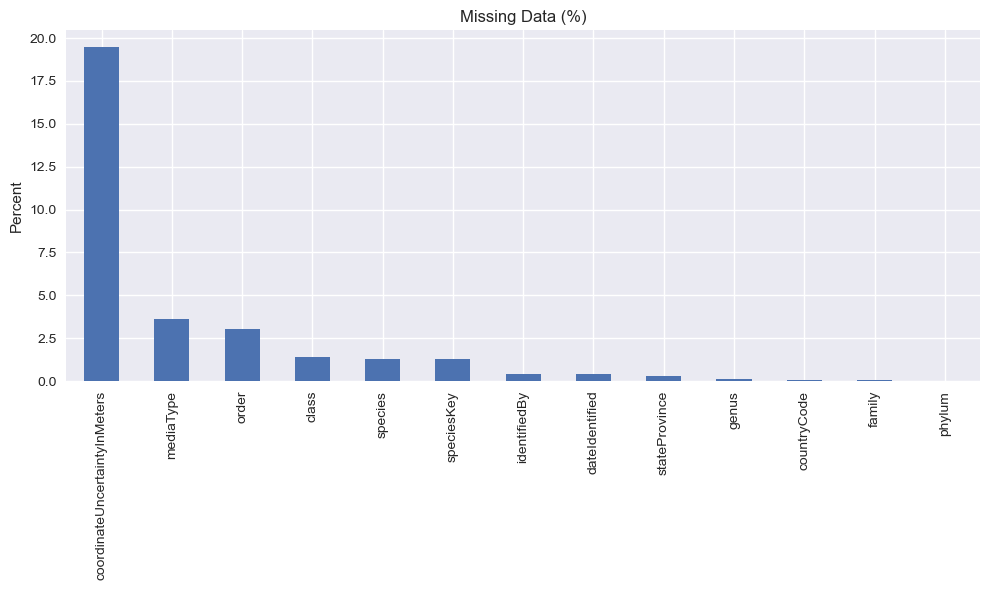

## 2. Taxonomic Distributions

### Kingdom Distribution

kingdom
Animalia     58149
Plantae      38786
Fungi         2664
Chromista       94
Protozoa        62
Bacteria        13
Viruses          5
Name: count, dtype: int64

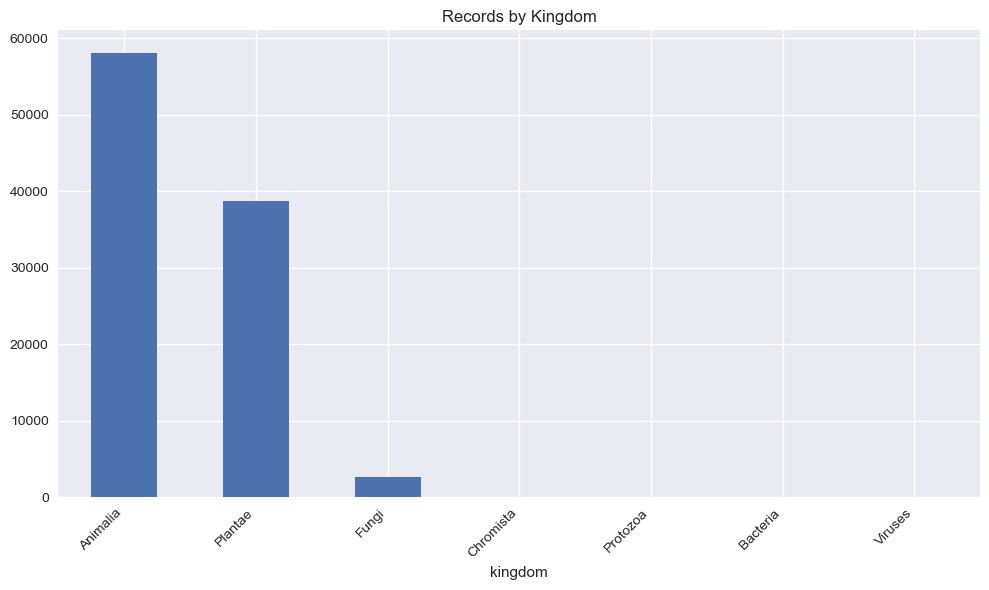

### Top Phyla

phylum
Tracheophyta       38321
Chordata           30114
Arthropoda         26080
Basidiomycota       1964
Mollusca            1392
Ascomycota           695
Bryophyta            307
Cnidaria             233
Echinodermata        202
Ochrophyta            90
Marchantiophyta       88
Mycetozoa             62
Rhodophyta            38
Porifera              38
Annelida              31
Name: count, dtype: int64

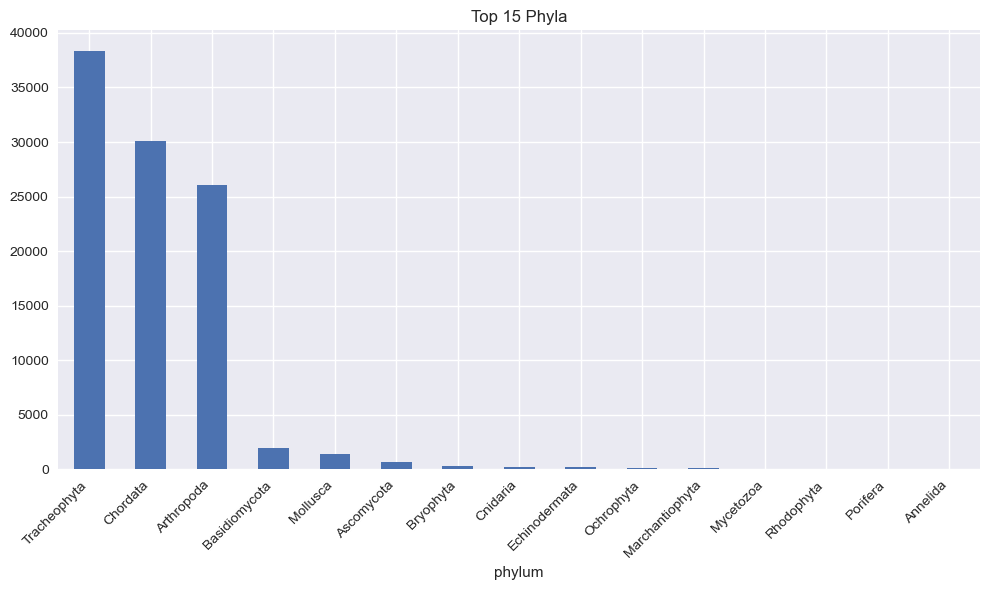

### Top Species

species
Anas platyrhynchos           467
Apis mellifera               348
Danaus plexippus             301
Passer domesticus            245
Turdus migratorius           243
Harmonia axyridis            238
Branta canadensis            225
Ardea herodias               223
Buteo jamaicensis            212
Ardea alba                   206
Sciurus carolinensis         203
Odocoileus virginianus       194
Columba livia                192
Haemorhous mexicanus         183
Cardinalis cardinalis        171
Zenaida macroura             156
Sturnus vulgaris             152
Agelaius phoeniceus          151
Achillea millefolium         147
Coccinella septempunctata    140
Name: count, dtype: int64

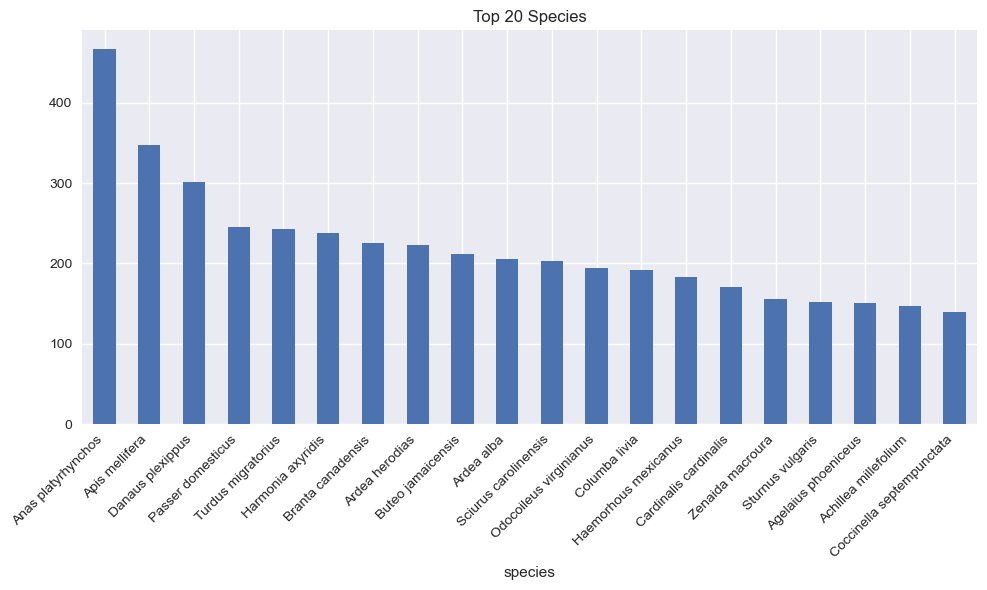

## 3. Geographic Distributions

### Top Countries

Country
United States                45225
Canada                        8176
Russian Federation            6147
Australia                     4442
Mexico                        3188
United Kingdom                3048
South Africa                  2419
Germany                       2146
France                        1697
New Zealand                   1623
Spain                         1620
Italy                         1492
Taiwan, Province of China     1189
Austria                        980
Argentina                      856
Name: count, dtype: int64

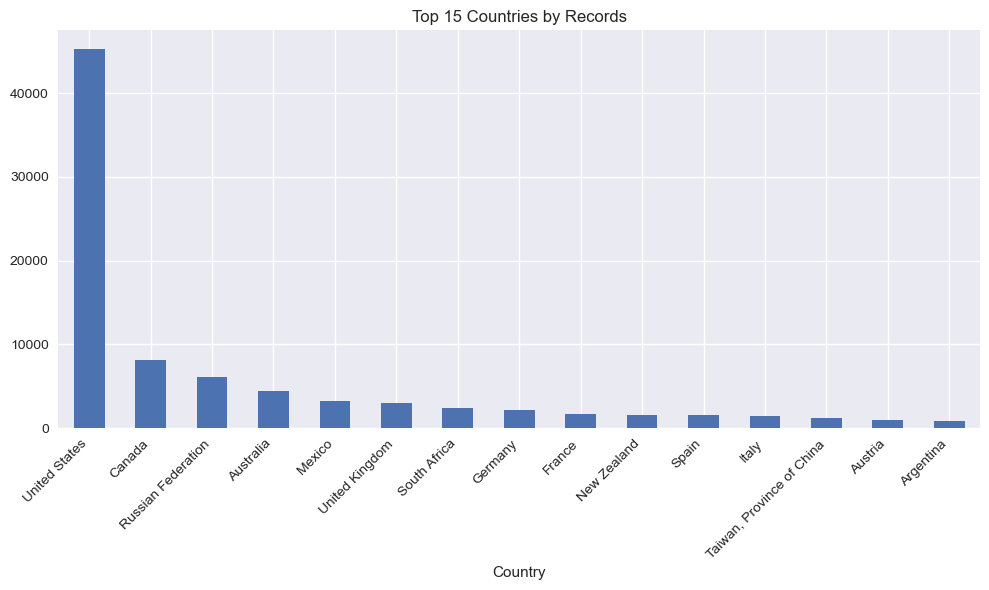

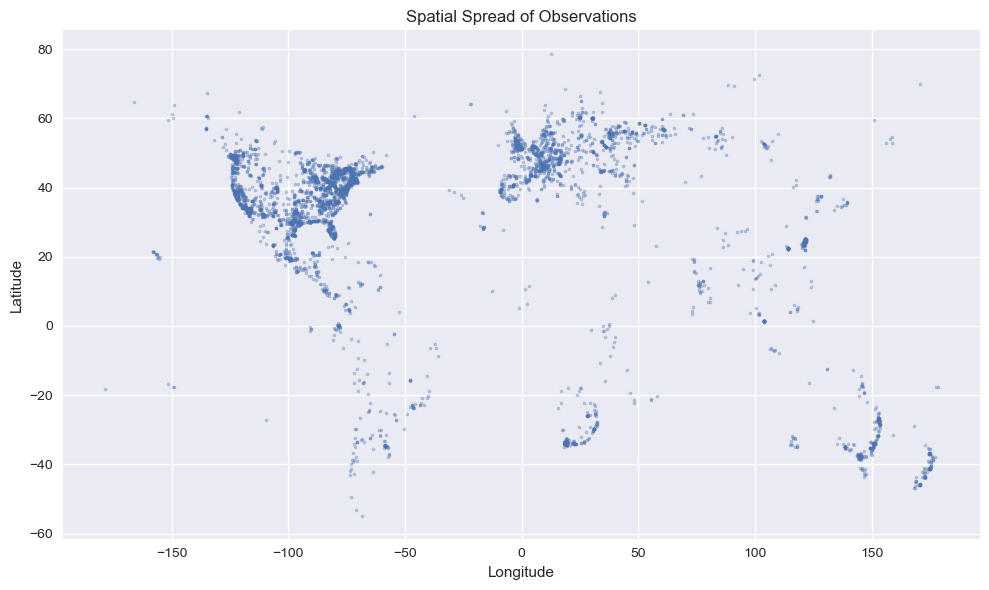

## 4. Temporal Patterns

,year,count
0,1960,1
1,1965,2
2,1966,1
3,1970,2
4,1971,1


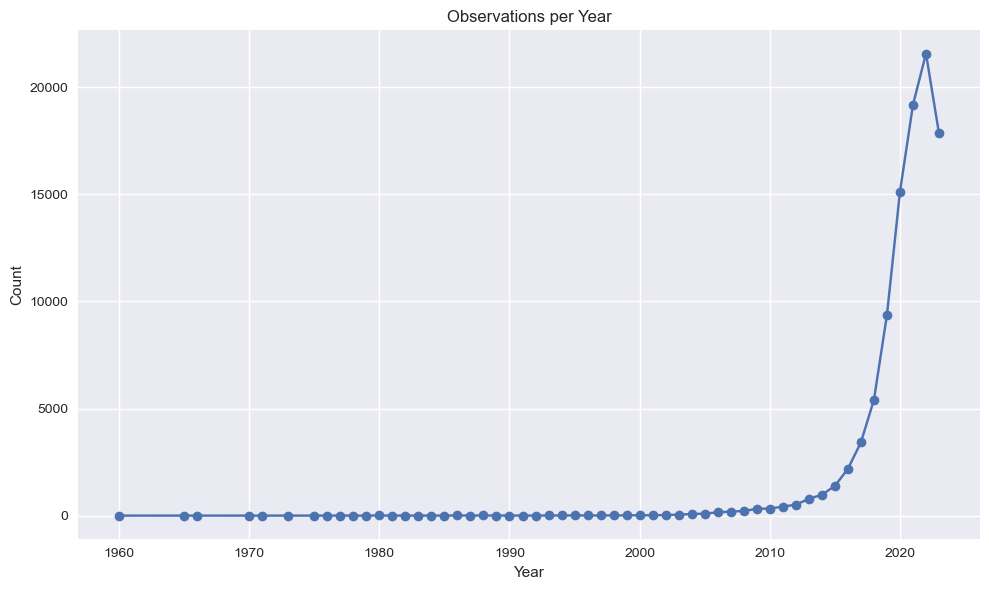

## 5. Correlation Heatmap

Using columns: ['year', 'month', 'decimalLatitude', 'decimalLongitude', 'coordinateUncertaintyInMeters']

,year,month,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters
year,1.000000,-0.079114,0.081279,0.006902,-0.004072
month,-0.079114,1.000000,-0.013527,0.024042,0.001884
decimalLatitude,0.081279,-0.013527,1.000000,-0.422886,-0.001251
decimalLongitude,0.006902,0.024042,-0.422886,1.000000,-0.002498
coordinateUncertaintyInMeters,-0.004072,0.001884,-0.001251,-0.002498,1.000000


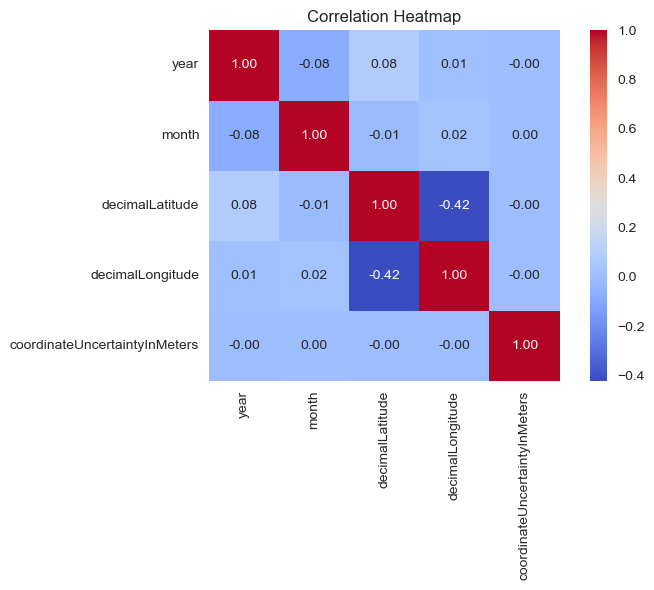

In [2]:
# TASK 2 — EXPLORATORY DATA ANALYSIS (EDA)
# ----------------------------------------
# This cell performs:
#   • Dataset overview
#   • Missing value analysis
#   • Taxonomic distributions (kingdom, phylum, species)
#   • Geographic distributions (country, lat/lon)
#   • Temporal patterns (per year)
#   • Correlation heatmap (selected numeric features)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

# --------------------------------------
# Load cleaned dataset
# --------------------------------------
df = pd.read_csv("APP_final_dashboard_dataset_8_clean.csv")
display(Markdown("## 1. Dataset Overview"))
print("Shape:", df.shape)
display(df.head())

# Ensure eventDate parsed
if "eventDate" in df.columns:
    df["eventDate"] = pd.to_datetime(df["eventDate"], errors="ignore")

# --------------------------------------
# Missing Values
# --------------------------------------
display(Markdown("### Missing Values (%)"))
missing = df.isna().mean().sort_values(ascending=False) * 100
display(missing)

plt.figure()
missing[missing > 0].plot(kind='bar')
plt.title("Missing Data (%)")
plt.ylabel("Percent")
plt.tight_layout()
plt.show()

# --------------------------------------
# Taxonomic Distributions
# --------------------------------------
display(Markdown("## 2. Taxonomic Distributions"))

if "kingdom" in df.columns:
    k = df["kingdom"].value_counts()
    display(Markdown("### Kingdom Distribution"))
    display(k)

    plt.figure()
    k.plot(kind='bar')
    plt.title("Records by Kingdom")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if "phylum" in df.columns:
    p = df["phylum"].value_counts().head(15)
    display(Markdown("### Top Phyla"))
    display(p)

    plt.figure()
    p.plot(kind='bar')
    plt.title("Top 15 Phyla")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if "species" in df.columns:
    s = df["species"].value_counts().head(20)
    display(Markdown("### Top Species"))
    display(s)

    plt.figure()
    s.plot(kind='bar')
    plt.title("Top 20 Species")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# --------------------------------------
# Geographic Distributions
# --------------------------------------
display(Markdown("## 3. Geographic Distributions"))

if "Country" in df.columns:
    top_c = df["Country"].value_counts().head(15)
    display(Markdown("### Top Countries"))
    display(top_c)

    plt.figure()
    top_c.plot(kind='bar')
    plt.title("Top 15 Countries by Records")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Lat/Lon scatter (sampling for clarity)
if {"decimalLatitude", "decimalLongitude"}.issubset(df.columns):
    sample = df.dropna(subset=["decimalLatitude","decimalLongitude"]).sample(
        min(5000, len(df)), random_state=42
    )
    plt.figure()
    plt.scatter(sample["decimalLongitude"], sample["decimalLatitude"], s=5, alpha=0.35)
    plt.title("Spatial Spread of Observations")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()

# --------------------------------------
# Temporal Trends
# --------------------------------------
display(Markdown("## 4. Temporal Patterns"))

if "year" in df.columns:
    df["year"] = pd.to_numeric(df["year"], errors='coerce')
    yearly = df.groupby("year").size().reset_index(name="count")

    display(yearly.head())

    plt.figure()
    plt.plot(yearly["year"], yearly["count"], marker="o")
    plt.title("Observations per Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# --------------------------------------
# Correlation Heatmap
# --------------------------------------
display(Markdown("## 5. Correlation Heatmap"))

corr_cols = [
    col for col in [
        "year","month","decimalLatitude","decimalLongitude",
        "coordinateUncertaintyInMeters","elevation",
        "depth","individualCount"
    ] if col in df.columns
]

if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    display(Markdown(f"Using columns: {corr_cols}"))
    display(corr)

    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    display(Markdown("Not enough numeric columns for correlation."))
